#### +) 어제 커밋 하지 못한 챕터 3 뒷부분들  

**pooler_output**을 만드는 과정은 다음 그림과 같이 마지막 레이어 **CLS** 벡터(**h**)에 행렬 하나를 곱한 뒤 해당 벡터 요소값 각각에 하이퍼볼릭탄젠트(tanh)를 취합니다. 하이퍼볼릭탄젠트란 코사인(cos), 사인(sin)같은 삼각함수의 일종입니다. 출력의 범위를 -1에서 1사이로 제한합니다.

<center><그림 3-68 pooler_output 벡터 만들기></center>

<p align="center">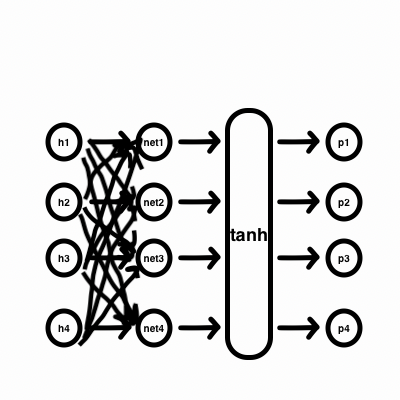

이처럼 자연어를 벡터로 바꾼 결과를 ***임베딩(embedding)*** 또는 ***리프레젠테이션(representation)*** 이라고 합니다. 우리는 **안녕하세요, 하이!**라는 두 문장을 단어 수준의 벡터 시퀀스(**output.last_hidden_state**)와 문장 수준의 벡터(**outputs.pooler_output**)로 변환했습니다.  
전자를 단어 수준 임베딩(리프레젠테이션), 후자를 문장 수준 임베딩(리프레젠테이션)이라고 부릅니다.

### 태스크 모듈 만들기
---
파인튜닝을 수행하려면 단어나 문장 수준 임베딩 위에 태스크를 수행하기 위한 작은 모듈을 추가해야 합니다.  
어떤 모듈을 사용할지는 다운스트림 태스크별로 조금씩 달라지는데요, 이와 관련해서는 4장 이후의 각 실습을 참고하기 바랍니다.

####<알아두면 좋은 TIP>
트랜스포머를 더 깊게 공부하고 싶다면 원 논문 정독을 추천합니다. 구글 연구팀이 2017년 발표했고, 같은 해 머신러닝 분야 세계 최고 학술지 가운데 하나인 NIPS(neural information processing systems)에 게재됐습니다. 논문 제목과 접속 링크입니다.

>- **Attension is All You Need**: arxiv.org/pdf/1706.03762.pdf

논문 제목이 도발적인 이유는 그만큼 저자들이 (셀프)어텐션이 중요하다는 걸 강조하고 싶었던 모양입니다.  
이 논문에서는 당시 자연어 처리는 물론 딥러닝(deep learning) 분야를 주름잡고 있었던 합성곱 신경망(CNN)과 순환 신경망(RNN)의 단점을 지적하며 트랜스포머를 새롭게 제안했습니다. 프리트레인 없이 모델을 처음부터 학습했는데도 영어-독일어, 영어-프랑스어 번역 과제에서 당시 기준 최고 성능을 기록해 주목을 받았습니다.

이후 자연어 처리의 역사는 트랜스포머와 함께했다고 봐도 과언이 아닙니다. BERT, GPT 등 요즘 널리 쓰이는 모델 아키텍처가 전부 트랜스포머입니다. 요즘에는 자연어 처리 외에 비전, 음성 등 다양한 분야에 널리 활용되고 있습니다.

두 가지 더 추천해 드립니다. 위의 트랜스포머 논문과 함께 읽으면 시너지를 낼 수 있습니다.  
하나는 트랜스포머의 모델 구조를 파이토치 코드로 해설한 블로그 페이지입니다. BERT 저자들마저도 이 페이지를 많이 참고했다고 자신의 논문에 언급할 정도로 권위 있는 글입니다.  
제목과 링크입니다.

>- **The Annotated Transformer**: nlp.seas.harvard.edu/2018/04/03/attention.html

다른 하나는 트랜스포머 계산 과정을 그림, 애니메이션, 동영상 등으로 시각화환 글입니다. 내부 동작 원리를 직관적으로 이해해 볼 수 있습니다.  
제목과 링크입니다.

>- **The Illustrated Transformer**: jalammer.github/io/illustrated-transformer